# Laboratorio 3 Caminos y Triángulos

En este laboratorio nos ahondaremos aún más en la librería Networkx para analizar ciertas características de los grafos como son los caminos, distancia entre nodos y clustering de un grafo.


Contenidos:

1.   Camino y distancia.
2.   Camino más corto.
3.   Distancia promedio de un grafo.
4.   Componentes conexas.
5.   Triángulos.
6.   Coeficiente de clustering.


In [1]:
import networkx as nx
%matplotlib inline

# Creación de Grafo Simple

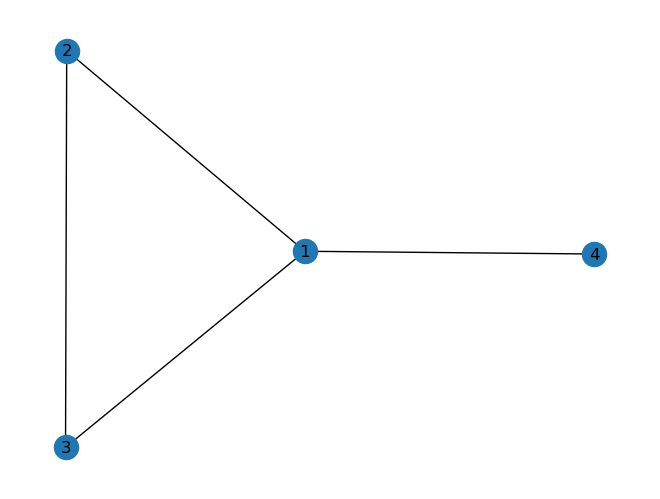

In [2]:


G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)


# Caminos

Un camino en una red es una secuencia de aristas que conectan dos nodos. En este ejemplo simple, podemos ver fácilmente que hay al menos un camino que conecta los nodos 3 y 4. Podemos verificar esto con NetworkX:


In [3]:
nx.has_path(G, 3, 4)

True

Un camino simple es aquel sin ciclos. Si permitiéramos ciclos, habría infinitos caminos porque siempre se podría dar la vuelta al ciclo tantas veces como se desee.

Puede haber más de un camino entre dos nodos. Nuevamente, considerando los nodos 3 y 4, hay dos "caminos simples" de este tipo:



In [4]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

## Camino más corto



A menudo, estamos más interesados en los caminos más cortos. En una red no ponderada, el camino más corto es aquel con la menor cantidad de aristas. Podemos ver que de los dos caminos simples entre los nodos 3 y 4, uno es más corto que el otro. Podemos obtener este camino más corto con una sola función de NetworkX:


In [5]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

Si deseamos el largo de este camino más corto, también hay una función para esto.

In [6]:
nx.shortest_path_length(G, 3, 4)

2

Observemos que el largo del camino se define como el numero de aristas que tengo que recorrer para llegar al nodo deseado. En otras palabras es la cantidad de nodos en el camino menos 1.

In [7]:
nx.shortest_path_length(G, 3, 4) == len(nx.shortest_path(G, 3, 4)) - 1

True

## Distancia Promedio de un Grafo

Comprender las distancia dentro de un grafo nos es útil para comprender las distancias que recorren los flujos dentro de él.
Es por esto que saber la distancia promedio nos da cierta idea del comportamiento dentro del grafo. Esta distancia promedio la podemos calcular siempre y cuando nuestro grafo sea conexo.

In [8]:
nx.average_shortest_path_length(G)

1.3333333333333333

# Componentes conexas
 En la red simple anterior, podemos ver que para cada par de nodos, podemos encontrar un camino que los conecta. Esta es la definición de un grafo conectado. Podemos verificar esta propiedad para un grafo dado:


In [9]:
nx.is_connected(G)

True

No todos los grafos deben estar totalmente conectado, ver siguiente ejemplo.

El grafo G esta conectado: False


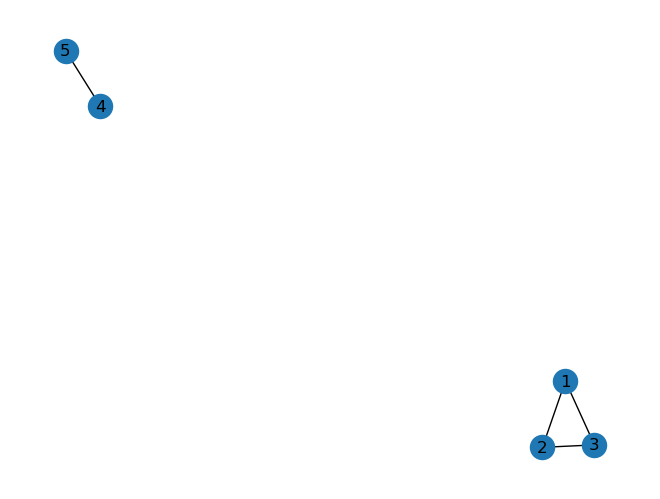

In [10]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)
print("El grafo G esta conectado:", nx.is_connected(G))

Y NetworkX generará un error si solicitas un camino entre nodos donde no existe ninguno:


In [11]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

## Número de Componentes Conexas

Visualmente, podemos identificar dos componentes conexas en nuestro grafo. Verifiquemos esto:


In [12]:
nx.number_connected_components(G)

2

La función `nx.connected_components()` toma un grafo y devuelve una lista de conjuntos de nombres de nodos, un conjunto de este tipo por cada componente conectado. Verifica que los dos conjuntos en la siguiente lista correspondan a las dos componentes conexas en el dibujo del grafo anterior:


In [13]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

A menudo, nos interesa la componente conexa más grande, que a veces se denomina núcleo de la red. Podemos hacer uso de la función incorporada max de Python para obtener la componente conexa más grande. Por defecto, la función max de Python ordena las cosas en orden lexicográfico (es decir, alfabético), lo cual no es útil aquí. Queremos la componente conexa mayor cuando se ordena en función de sus tamaños, así que pasamos len como una función de clave:


In [14]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

Si bien a menudo es suficiente tener la lista de nombres de los nodos, a veces necesitamos el subgrafo real que consiste en la componente conexa más grande. Una forma de obtener esto es pasar la lista de nombres de nodos a la función `G.subgraph()`:


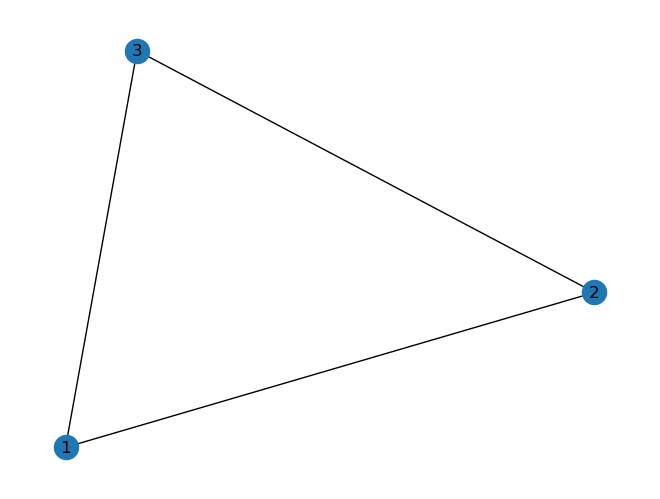

In [15]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

# 3. Caminos y componentes en grafos dirigidos

Extendamos estas ideas sobre caminos y componentes conectados a grafos dirigidos.


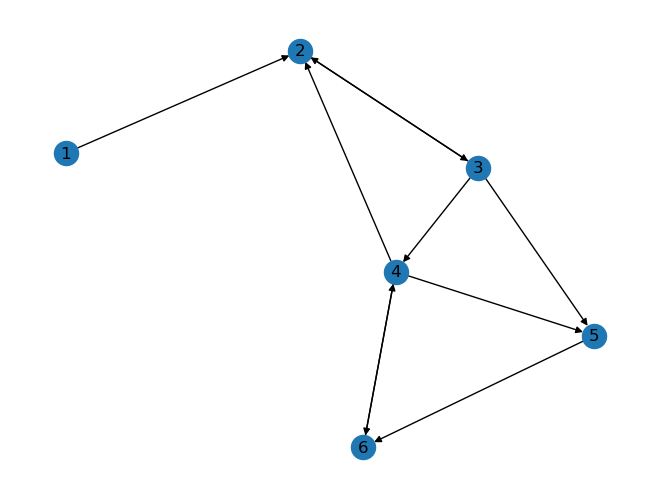

In [16]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

Sabemos que en un grafo dirigido, una arista desde un nodo arbitrario  `𝑢`  hasta un nodo arbitrario  `𝑣`  no implica que exista una arista desde  `𝑣`  hasta  `𝑢` . Dado que los caminos deben seguir la dirección de las aristas en los grafos dirigidos, la misma asimetría se aplica para los caminos. Observa que este grafo tiene un camino de 1 a 4, pero no en la dirección inversa.

In [17]:
print(nx.has_path(D, 1, 4))
print(nx.has_path(D, 4, 1))

True
False


 Las demás funciones de NetworkX que tratan con caminos también tienen en cuenta esta asimetría:


In [18]:
print(nx.shortest_path(D, 2, 5))
print(nx.shortest_path(D, 5, 2))

[2, 3, 5]
[5, 6, 4, 2]


## Componentes Conexas en grafo dirigido
Las redes dirigidas tienen dos tipos de conectividad. Fuertemente conectado significa que existe un camino dirigido entre cada par de nodos, es decir, que desde cualquier nodo podemos llegar a cualquier otro nodo siguiendo la dirección de las aristas. Piensa en automóviles en una red de calles de sentido único: no pueden conducir contra el flujo del tráfico.

In [19]:
nx.is_strongly_connected(D)

False


Débilmente conectado significa que existe un camino entre cada par de nodos, independientemente de la dirección. Piensa en peatones en una red de calles de sentido único: caminan por las aceras, por lo que no les importa la dirección del tráfico.



In [20]:
nx.is_weakly_connected(D)

True

En el caso de grafos dirigidos, en vez de utilizar nx.connected_components tendremos que utilizar o bien nx.weakly_connected_components o nx.strongly_connected_components para definir las componentes conexas.

In [21]:
print(list(nx.weakly_connected_components(D)))
print(list(nx.strongly_connected_components(D)))

[{1, 2, 3, 4, 5, 6}]
[{2, 3, 4, 5, 6}, {1}]


# Triangulos

Volvamos al grafo del comienzo, se desea estudiar las comunidades dentro de un grafo. Para esto podemos analizar los triángulos de la red.

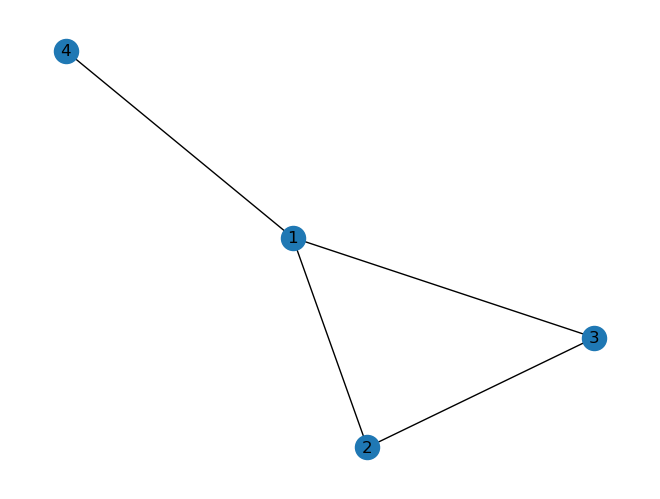

In [22]:

G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

Podemos analizar la cantidad de triángulos a los cuales pertenece cada nodo.

In [23]:
print(nx.triangles(G, 1))
print(nx.triangles(G, 4))

1
0


También podemos ver la cantidad de triángulos que pertenece todos los nodos del grafo.

In [24]:
nx.triangles(G)

{1: 1, 2: 1, 3: 1, 4: 0}

Así como también sabe la cantidad total de triángulos en la red

In [25]:
sum(nx.triangles(G).values()) / 3

1.0

# Coeficiente de Clustering

Dado un nodo `v` en un grafo G, el coeficiente de clustering de `v` hace referencia a la proporción entre los triángulos que contienen a `v` y la máxima cantidad de triángulos que podrían contener a `v`.

In [26]:
nx.clustering(G)

{1: 0.3333333333333333, 2: 1.0, 3: 1.0, 4: 0}

De la misma forma se puede obtener el promedio del coeficiente de clustering como medida de todo el grafo.

In [27]:
nx.average_clustering(G)

0.5833333333333333

# Base de datos: US air traffic network

Para los ejercicios utilizaremos la base de datos [openflights USA](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/datasets/openflights/openflights_usa.graphml.gz).
Para esto utilice el códifo siguiente o descargue manualmente y coloque el archivo en la carpeta `/content` (Si esta trabajando en Colab).

Los nodos en este grafo son aeropuertos, representados por sus códigos IATA; dos nodos están conectados por una arista si hay un vuelo programado que conecta directamente estos dos aeropuertos. Supondremos que este grafo es no dirigido, ya que un vuelo en una dirección generalmente implica que hay un vuelo de regreso.


In [28]:
import requests
import os

# URL del archivo comprimido en GitHub
url = "https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.graphml.gz"
response = requests.get(url)
# Carpeta de destino para la descarga
download_folder = os.getcwd()
filename = 'openflights_usa.graphml.gz'
# Guardar el archivo
with open(os.path.join(download_folder, filename), 'wb') as file:
    file.write(response.content)

Ahora cargamos el grafo desde el archivo descargado.

In [29]:
#G = nx.read_graphml("/content/openflights_usa.graphml.gz")
G = nx.read_graphml(os.path.join(download_folder, filename))
print("Nodos:", list(G.nodes))
print("Aristas:", list(G.edges)[1:5])

Nodos: ['RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA', 'HOT', 'OGG', 'ICT', 'MCI', 'MSN'

Estos nodos también tienen atributos asociados con ellos, que contienen información adicional sobre los aeropuertos:

In [30]:
G.nodes['EUG']

{'name': 'Mahlon Sweet Field',
 'latitude': 44.12459945678711,
 'longitude': -123.21199798583984,
 'IATA': 'EUG'}